# Unity check

In [19]:
# Main modules
import numpy as np
import matplotlib.pyplot as plt
import os
plt.style.use('publication23.mplstyle')

# Integration
from scipy.integrate import quad

# Custom modules
import modules_py.functions as f

In [14]:
# data_getter

def get_data_from_file(filename):
    data = np.genfromtxt(filename)
    if data.ndim == 1:
        return np.array([data[0]]), np.array([data[1:]])
    else:
        return data[:, 0], data[:, 1:]

In [25]:
def integrand(w, k, pf):
    return 2 / np.pi * w * f.d_pnn_corr_pnd(k, w, pf, width=0).imag

pf = '1.520'
graphs_dir = 'graph_data/'
function_name = 'unity_eq_pnn_corr_pnd_legacy'

graph_files = os.listdir(graphs_dir + function_name + '/' + pf)

In [16]:
k_integral_values = []
integral_values = []

contribution_integral = []
contribution_sum = []

for graph_file in graph_files:
    k_integral_values_for_file = np.array([])
    integral_values_for_file = np.array([])
    
    contribution_integral_for_file = np.array([])
    contribution_sum_for_file = np.array([])
    
    filename = graphs_dir + function_name + '/' + pf + '/' + graph_file
    
    K, W = get_data_from_file(filename)
    
    for i, k in enumerate(K):
        # Учесть вклад от интеграла
        integral_value, _ = quad(integrand, 1e-9, 20, args=(k, float(pf)))
        contribution_integral_for_file = np.append(contribution_integral_for_file, integral_value)
        
        # Учесть вклад от суммы
        sum_tmp = 0.
        for w in W[i, :]:
            if np.abs(f.d_pnn_corr_pnd(k, w, float(pf), width=0).imag) < 1e-5:
                sum_tmp += 2. * w / (2. * w - f.pi_pnn_corr_pnd_dw(k, w, float(pf)))
        contribution_sum_for_file = np.append(contribution_sum_for_file, sum_tmp)
        
        integral_value += sum_tmp
        
        integral_values_for_file = np.r_[integral_values_for_file, integral_value]
        k_integral_values_for_file = np.r_[k_integral_values_for_file, k]
        
    integral_values.append(integral_values_for_file)
    k_integral_values.append(k_integral_values_for_file)
    
    contribution_integral.append(contribution_integral_for_file)
    contribution_sum.append(contribution_sum_for_file)

<ipython-input-16-78987ccc56b6>:20: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_value, _ = quad(integrand, 1e-9, 20, args=(k, float(pf)))
<ipython-input-16-78987ccc56b6>:20: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_value, _ = quad(integrand, 1e-9, 20, args=(k, float(pf)))


/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/vladlen/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dt

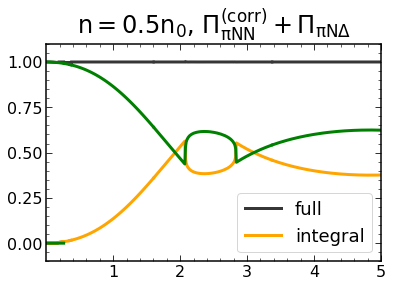

In [26]:
%matplotlib inline

# print(k_integral_values.size)
# print(integral_values.size)

# print(contribution_integral)
# print(contribution_sum)

label_done = False
for k, i in zip(k_integral_values, integral_values):
    if label_done:
        plt.plot(k, i, color='#363636')
    else:
        plt.plot(k, i, color='#363636', label='full')
        label_done = True

label_done = False
for k, c_i in zip(k_integral_values, contribution_integral):
    if label_done:
        plt.plot(k, c_i, color='orange')
    else:
        plt.plot(k, c_i, color='orange', label='integral')
        label_done = True

# label_done = False
for k, c_s in zip(k_integral_values, contribution_sum):
    if label_done:
        plt.plot(k, c_s, color='green')
    else:
        plt.plot(k, c_s, color='green', label='sum')
        label_done = True
        
plt.title(
    r'$n = %.1f n_0$, $\Pi_{\pi N N}^{(corr)} + \Pi_{\pi N \Delta}$' % \
    (2 * float(pf) ** 3 / (3 * np.pi ** 2 * .47))
)
plt.ylim(-.1, 1.1)
plt.legend()
plt.show()